In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, BatchNormalization
from keras.optimizers import SGD
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical
from keras.models import Model
from keras.models import Sequential
from keras.callbacks import EarlyStopping
import keras
import keras.utils
from keras import utils as np_utils

In [4]:
##LOADING THE DATASET FROM KERAS
tf.keras.datasets.cifar10.load_data()


170498071/170498071 [==============================] - 2s 0us/step


((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

**Q1)**

In [5]:
## NOW WE WILL SPLIT THE DATASET INTO X_TRAIN , Y_TRAIN, X_TEST_, Y_TEST
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

**Q2)**

In [6]:
print("SHAPE OF X_TRAIN:",x_train.shape)
print("SHAPE OF Y_TRAIN:",y_train.shape)
print("SHAPE OF X_TEST:",x_test.shape)
print("SHAPE OF Y_TEST:",y_test.shape)

SHAPE OF X_TRAIN: (50000, 32, 32, 3)
SHAPE OF Y_TRAIN: (50000, 1)
SHAPE OF X_TEST: (10000, 32, 32, 3)
SHAPE OF Y_TEST: (10000, 1)


**Q3)**

In [7]:
# labels = {
#     '0': 'Airplane',
#     '1': 'Automobile',
#     '2': 'Bird',
#     '3': 'Cat',
#     '4': 'Deer',
#     '5': 'Dog',
#     '6': 'Frog',
#     '7': 'Horse',
#     '8': 'Ship',
#     '9': 'Truck'
#     }
## the data is normalised by dividing the training set by 255 inrder to bring
## in closer to the [0,1] mark which then helps us to reduce ther overall varience
## and would then help us train the data better

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0



**Q4)**

In [8]:
## NOW WE WILL CONVERT THE TARGET DATA INTO ONE - HOT ENCODING
num_classes =10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

**Q5)**

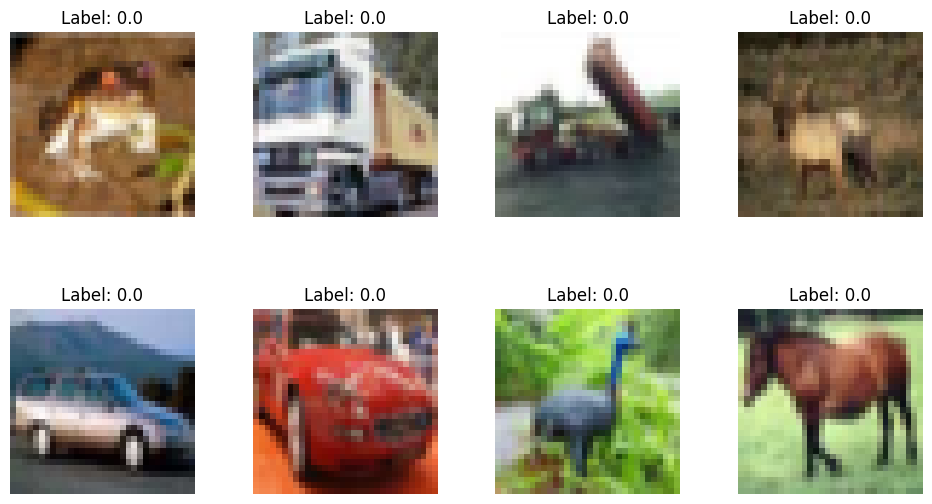

In [9]:
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
fig.subplots_adjust(hspace=0.5)

# Visualize the first 8 images
for i in range(8):
    row = i // 4
    col = i % 4
    ax = axes[row, col]
    ax.imshow(x_train[i])
    ax.set_title(f"Label: {y_train[i][0]}")
    ax.axis('off')

plt.show()

In [10]:
model= keras.models.Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(2048,activation='relu'))
model.add(Dense(2048, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer=SGD(learning_rate=0.01),
    metrics=['accuracy'])



In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 2048)              6293504   
                                                                 
 dense_1 (Dense)             (None, 2048)              4196352   
                                                                 
 dense_2 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_3 (Dense)             (None, 512)               524800    
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 10)                2

In [12]:
validation_split=0.1
num_samples= x_train.shape[0]
num_validation_samples = int(num_samples * validation_split)
x_val = x_train[:num_validation_samples]
y_val = y_train[:num_validation_samples]
x_train = x_train[num_validation_samples:]
y_train = y_train[num_validation_samples:]
# model.fit(data, labels, epochs=10, batch_size=32)

In [13]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=2, restore_best_weights=True)
batch_size = 32
epochs = 10
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val), callbacks=[early_stopping])

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Epoch 1/10
1407/1407 [==============================] - 168s 118ms/step - loss: 1.8587 - accuracy: 0.3325 - val_loss: 1.9045 - val_accuracy: 0.2952
Epoch 2/10
1407/1407 [==============================] - 169s 120ms/step - loss: 1.6476 - accuracy: 0.4126 - val_loss: 1.8317 - val_accuracy: 0.3432
Epoch 3/10
1407/1407 [==============================] - 164s 117ms/step - loss: 1.5536 - accuracy: 0.4438 - val_loss: 1.5645 - val_accuracy: 0.4282
Epoch 4/10
1407/1407 [==============================] - 172s 122ms/step - loss: 1.4857 - accuracy: 0.4708 - val_loss: 1.6239 - val_accuracy: 0.4096
Epoch 5/10
313/313 [==============================] - 13s 41ms/step - loss: 1.5639 - accuracy: 0.4301
Test Accuracy: 43.01%


In [14]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=2, restore_best_weights=True)
batch_sizes = [16, 32, 64, 128]
epochs = 10
for batch_size in batch_sizes:
    print(f"Training with batch size {batch_size}")
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val), callbacks=[early_stopping])

    # Evaluate the model on the test data
    test_loss, test_accuracy = model.evaluate(x_test, y_test)
    print(f'Test Accuracy (Batch Size {batch_size}): {test_accuracy * 100:.2f}%')

Training with batch size 16
Epoch 1/10
2813/2813 [==============================] - 248s 88ms/step - loss: 1.5437 - accuracy: 0.4483 - val_loss: 1.7091 - val_accuracy: 0.4058
Epoch 2/10
2813/2813 [==============================] - 251s 89ms/step - loss: 1.4630 - accuracy: 0.4775 - val_loss: 1.5288 - val_accuracy: 0.4522
Epoch 3/10
2813/2813 [==============================] - 258s 92ms/step - loss: 1.4018 - accuracy: 0.5003 - val_loss: 1.5990 - val_accuracy: 0.4466
Epoch 4/10
2813/2813 [==============================] - 252s 90ms/step - loss: 1.3447 - accuracy: 0.5206 - val_loss: 1.4482 - val_accuracy: 0.4836
Epoch 5/10
2813/2813 [==============================] - 255s 90ms/step - loss: 1.2976 - accuracy: 0.5349 - val_loss: 1.6307 - val_accuracy: 0.4534
Epoch 6/10
2813/2813 [==============================] - 254s 90ms/step - loss: 1.2512 - accuracy: 0.5520 - val_loss: 1.4150 - val_accuracy: 0.5016
Epoch 7/10
2813/2813 [==============================] - 254s 90ms/step - loss: 1.2041 - ac

In [15]:
model= keras.models.Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))

model.add(Dense(2048, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(num_classes, activation='softmax'))


model.compile(
    loss='categorical_crossentropy',
    optimizer=SGD(learning_rate=0.01),
    metrics=['accuracy'])

In [16]:
validation_split = 0.1
num_samples = x_train.shape[0]
num_validation_samples = int(num_samples * validation_split)
x_val = x_train[:num_validation_samples]
y_val = y_train[:num_validation_samples]
x_train = x_train[num_validation_samples:]
y_train = y_train[num_validation_samples:]

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=2, restore_best_weights=True)

# Train the model with a batch size of 32 and for 10 epochs
batch_size = 32
epochs = 10
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val), callbacks=[early_stopping])

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Epoch 1/10
1266/1266 [==============================] - 100s 78ms/step - loss: 1.7611 - accuracy: 0.3835 - val_loss: 1.5620 - val_accuracy: 0.4384
Epoch 2/10
1266/1266 [==============================] - 96s 76ms/step - loss: 1.5072 - accuracy: 0.4654 - val_loss: 1.5134 - val_accuracy: 0.4689
Epoch 3/10
1266/1266 [==============================] - 93s 74ms/step - loss: 1.4154 - accuracy: 0.5001 - val_loss: 1.5297 - val_accuracy: 0.4569
Epoch 4/10
1266/1266 [==============================] - 95s 75ms/step - loss: 1.3581 - accuracy: 0.5196 - val_loss: 1.4903 - val_accuracy: 0.4811
Epoch 5/10
1266/1266 [==============================] - 97s 76ms/step - loss: 1.3123 - accuracy: 0.5360 - val_loss: 1.5641 - val_accuracy: 0.4447
Epoch 6/10
313/313 [==============================] - 12s 37ms/step - loss: 1.4997 - accuracy: 0.4769
Test Accuracy: 47.69%


In [18]:
model = Sequential()

# Add a 3x3 2D convolution layer with zero padding (same), 32 filters, and ReLU activation
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))

# Add another 3x3 2D convolution layer with no padding, 32 filters, and ReLU activation
model.add(Conv2D(32, (3, 3), activation='relu'))

# Add MaxPooling with size (2,2)
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add a 3x3 2D convolution layer with no padding, 64 filters, and ReLU activation
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add another 3x3 2D convolution layer with no padding, 64 filters, and ReLU activation
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add MaxPooling with size (2,2)
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output
model.add(Flatten())

# Add a dense layer with 512 nodes and ReLU activation
model.add(Dense(512, activation='relu'))

# Add a softmax output layer with 10 nodes
model.add(Dense(num_classes, activation='softmax'))

# Compile the model with the same optimizer and metrics as the dense network
model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])

# Set aside a portion (10%) of the training data for validation
validation_split = 0.1
num_samples = x_train.shape[0]
num_validation_samples = int(num_samples * validation_split)
x_val = x_train[:num_validation_samples]
y_val = y_train[:num_validation_samples]
x_train = x_train[num_validation_samples:]
y_train = y_train[num_validation_samples:]

# Implement early stopping because this always prevents overfitting of the data set (where the analysis is very close )
early_stopping = EarlyStopping(monitor='val_accuracy', patience=2, restore_best_weights=True)

# Train the model
batch_size = 32
epochs = 10
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val), callbacks=[early_stopping])

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Epoch 1/10
1140/1140 [==============================] - 200s 174ms/step - loss: 2.0795 - accuracy: 0.2374 - val_loss: 1.9666 - val_accuracy: 0.2669
Epoch 2/10
1140/1140 [==============================] - 206s 180ms/step - loss: 1.7204 - accuracy: 0.3872 - val_loss: 2.7499 - val_accuracy: 0.2057
Epoch 3/10
1140/1140 [==============================] - 201s 176ms/step - loss: 1.5210 - accuracy: 0.4538 - val_loss: 1.8418 - val_accuracy: 0.3780
Epoch 4/10
1140/1140 [==============================] - 198s 173ms/step - loss: 1.4115 - accuracy: 0.4969 - val_loss: 1.7160 - val_accuracy: 0.3886
Epoch 5/10
1140/1140 [==============================] - 197s 173ms/step - loss: 1.3250 - accuracy: 0.5319 - val_loss: 1.6181 - val_accuracy: 0.4294
Epoch 6/10
1140/1140 [==============================] - 202s 177ms/step - loss: 1.2461 - accuracy: 0.5599 - val_loss: 1.9188 - val_accuracy: 0.3980
Epoch 7/10
1140/1140 [==============================] - 188s 165ms/step - loss: 1.1698 - accuracy: 0.5886 - val_

**Q15)**

In [21]:
model = Sequential()

# Add a 3x3 2D convolution layer with zero padding (same), 32 filters, and ReLU activation
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))

# Add another 3x3 2D convolution layer with no padding, 32 filters, and ReLU activation
model.add(Conv2D(32, (3, 3), activation='relu'))

# Add MaxPooling with size (2,2)
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add a 3x3 2D convolution layer with no padding, 64 filters, and ReLU activation
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add another 3x3 2D convolution layer with no padding, 64 filters, and ReLU activation
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add MaxPooling with size (2,2)
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output
model.add(Flatten())

# Add a dense layer with 512 nodes and ReLU activation
model.add(Dense(512, activation='relu'))

# Add a softmax output layer with 10 nodes
model.add(Dense(num_classes, activation='softmax'))

# Compile the model with the same optimizer and metrics as the dense network
model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])

# Set aside a portion (10%) of the training data for validation
validation_split = 0.1
num_samples = x_train.shape[0]
num_validation_samples = int(num_samples * validation_split)
x_val = x_train[:num_validation_samples]
y_val = y_train[:num_validation_samples]
x_train = x_train[num_validation_samples:]
y_train = y_train[num_validation_samples:]

# Implement early stopping because this always prevents overfitting of the data set (where the analysis is very close )
early_stopping = EarlyStopping(monitor='val_accuracy', patience=2, restore_best_weights=True)

# Train the model
batch_size = 64
epochs = 10
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val), callbacks=[early_stopping])

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Epoch 1/10
416/416 [==============================] - 148s 355ms/step - loss: 2.2104 - accuracy: 0.1747 - val_loss: 2.8238 - val_accuracy: 0.1138
Epoch 2/10
416/416 [==============================] - 143s 345ms/step - loss: 1.9728 - accuracy: 0.2876 - val_loss: 1.9790 - val_accuracy: 0.2636
Epoch 3/10
416/416 [==============================] - 140s 337ms/step - loss: 1.8300 - accuracy: 0.3463 - val_loss: 2.1506 - val_accuracy: 0.2815
Epoch 4/10
416/416 [==============================] - 140s 336ms/step - loss: 1.7130 - accuracy: 0.3857 - val_loss: 1.6781 - val_accuracy: 0.3675
Epoch 5/10
416/416 [==============================] - 141s 339ms/step - loss: 1.6132 - accuracy: 0.4212 - val_loss: 1.5787 - val_accuracy: 0.4404
Epoch 6/10
416/416 [==============================] - 140s 336ms/step - loss: 1.5236 - accuracy: 0.4553 - val_loss: 2.0053 - val_accuracy: 0.3171
Epoch 7/10
416/416 [==============================] - 144s 347ms/step - loss: 1.4660 - accuracy: 0.4727 - val_loss: 1.4916 -

1/1 [==============================] - 0s 190ms/step


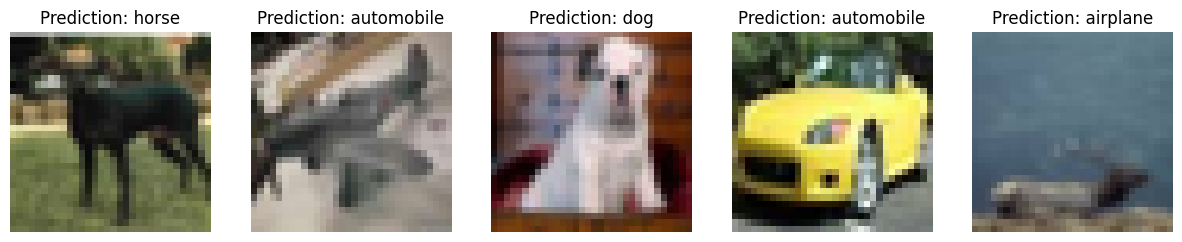

In [22]:
class_names = [
    "airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"
]

# Choose a few example images from the test set
num_examples = 5
example_indices = np.random.choice(x_test.shape[0], num_examples, replace=False)

# Make predictions for the selected examples
predictions = model.predict(x_test[example_indices])

# Create subplots to display the images and predictions
fig, axes = plt.subplots(1, num_examples, figsize=(15, 3))
for i, ax in enumerate(axes):
    # Display the image
    ax.imshow(x_test[example_indices[i]])
    ax.axis('off')
    ax.set_title(f"Prediction: {class_names[np.argmax(predictions[i])]}")

plt.show()

313/313 [==============================] - 16s 51ms/step


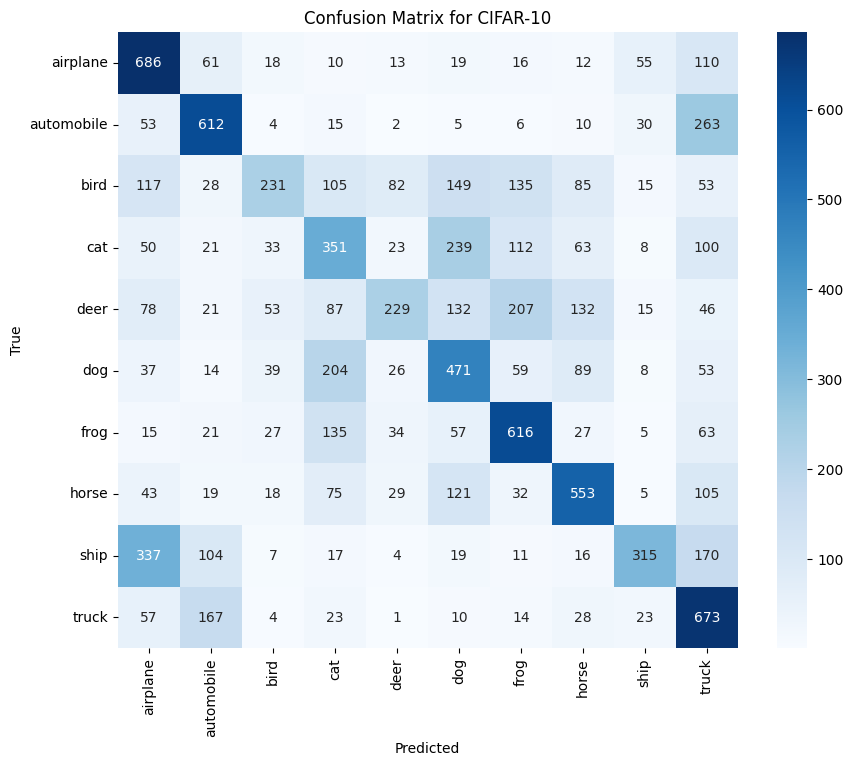

In [25]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(_, _), (_, y_test) = cifar10.load_data()

# Make predictions on the test data using the trained model
predictions = model.predict(x_test)

# Get the predicted class labels by finding the index of the maximum probability in each prediction
predicted_labels = np.argmax(predictions, axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_test, predicted_labels)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for CIFAR-10")
plt.show()
